Load all Libraries

In [2]:
import numpy as np     
import pandas as pd
import matplotlib.pyplot as plt   
  

In [3]:
data=pd.read_csv("zomato.csv")

Load the data


In [4]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
data.shape

(51717, 17)

In [6]:
data.columns.to_list()

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

# Data Cleaning

In [7]:
data.rename(columns={'approx_cost(for two people)':'approx_cost','listed_in(city)': 'area'}, inplace = True)

# Lets drops irrelevent data

In [8]:
data.drop(['url','address','menu_item','reviews_list','dish_liked','phone','listed_in(type)'],axis=1,inplace=True)

In [9]:
df=data

In [10]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Banashankari


# Lets check the Datatypes

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   cuisines      51672 non-null  object
 8   approx_cost   51371 non-null  object
 9   area          51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


# Lets check 'rate' column

In [12]:
# unique values
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Lets replace all the null and garbage values

In [13]:

df['rate'] =  df['rate'].str.replace("/5", "")
df['rate'] =  df['rate'].str.replace("nan", "NaN")
df['rate'] =  df['rate'].str.replace("NEW", "NaN")
df['rate'] =  df['rate'].str.replace("-", "NaN")
df['rate'] =  df['rate'].str.replace(" /5", "")
df['rate'] =  df['rate'].fillna(np.nan)
df['rate'] =  df['rate'].str.replace(" ", "")

In [14]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NaN', '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

Lets check for 'approx_cost' column

In [15]:
# unique values
df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [16]:
df['approx_cost']=df['approx_cost'].str.replace("nan","NAN")
df['approx_cost']=df['approx_cost'].fillna('NaN')
df['approx_cost']=df['approx_cost'].str.replace(",","")

In [17]:
df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'NaN', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

Now lets change the datatype object to float

In [18]:
df['approx_cost']=df['approx_cost'].astype(float)
df['rate']=df['rate'].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          41665 non-null  float64
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   approx_cost   51371 non-null  float64
 9   area          51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


Lets check the data description by describe the data

In [20]:
df.describe()

,rate,votes,approx_cost
count,41665.000000,51717.000000,51371.000000
mean,3.700449,283.697527,555.431566
std,0.440513,803.838853,438.850728
min,1.800000,0.000000,40.000000
25%,3.400000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,4.000000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


# Lets check the null values

In [21]:
df.isnull().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
cuisines           45
approx_cost       346
area                0
dtype: int64

Lets check the percentage of null values

In [22]:
(df.isnull().sum()/df.shape[0])*100

name             0.000000
online_order     0.000000
book_table       0.000000
rate            19.436549
votes            0.000000
location         0.040606
rest_type        0.438927
cuisines         0.087012
approx_cost      0.669026
area             0.000000
dtype: float64

From the above execution we found columns "location","rest_type","cuisins","approx_cost" have less number of null values

In [23]:
df=df[df['location'].notna()]
df=df[df['rest_type'].notna()]
df=df[df['cuisines'].notna()]
df=df[df['approx_cost'].notna()]

In [24]:
df.isna().sum()

name               0
online_order       0
book_table         0
rate            9885
votes              0
location           0
rest_type          0
cuisines           0
approx_cost        0
area               0
dtype: int64

Lets handle the null values in 'rate'

In [25]:
df["rate"].describe()

count    41263.000000
mean         3.702011
std          0.439985
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

Lets check the outliers by statistical method

In [26]:
q1=df['rate'].quantile(0.25)
q3=df['rate'].quantile(0.75)

xyz=q3-q1

lower_range=q1-(1.5*xyz)
upper_range=q3+(1.5*xyz)

outliers=len(df[(df['rate']<lower_range)|(df['rate']>upper_range)])
print("Number of Rows having outliers:",outliers)


Number of Rows having outliers: 183


In [27]:
df['rate']=df['rate'].fillna(df['rate'].median())

df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
approx_cost     0
area            0
dtype: int64

Lets check the numerical columns

In [28]:
Numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print("there are {} numerical features and their names are {}".format(len(Numerical_features),Numerical_features))

there are 3 numerical features and their names are ['rate', 'votes', 'approx_cost']


Lets check for the distribution of the numerical features

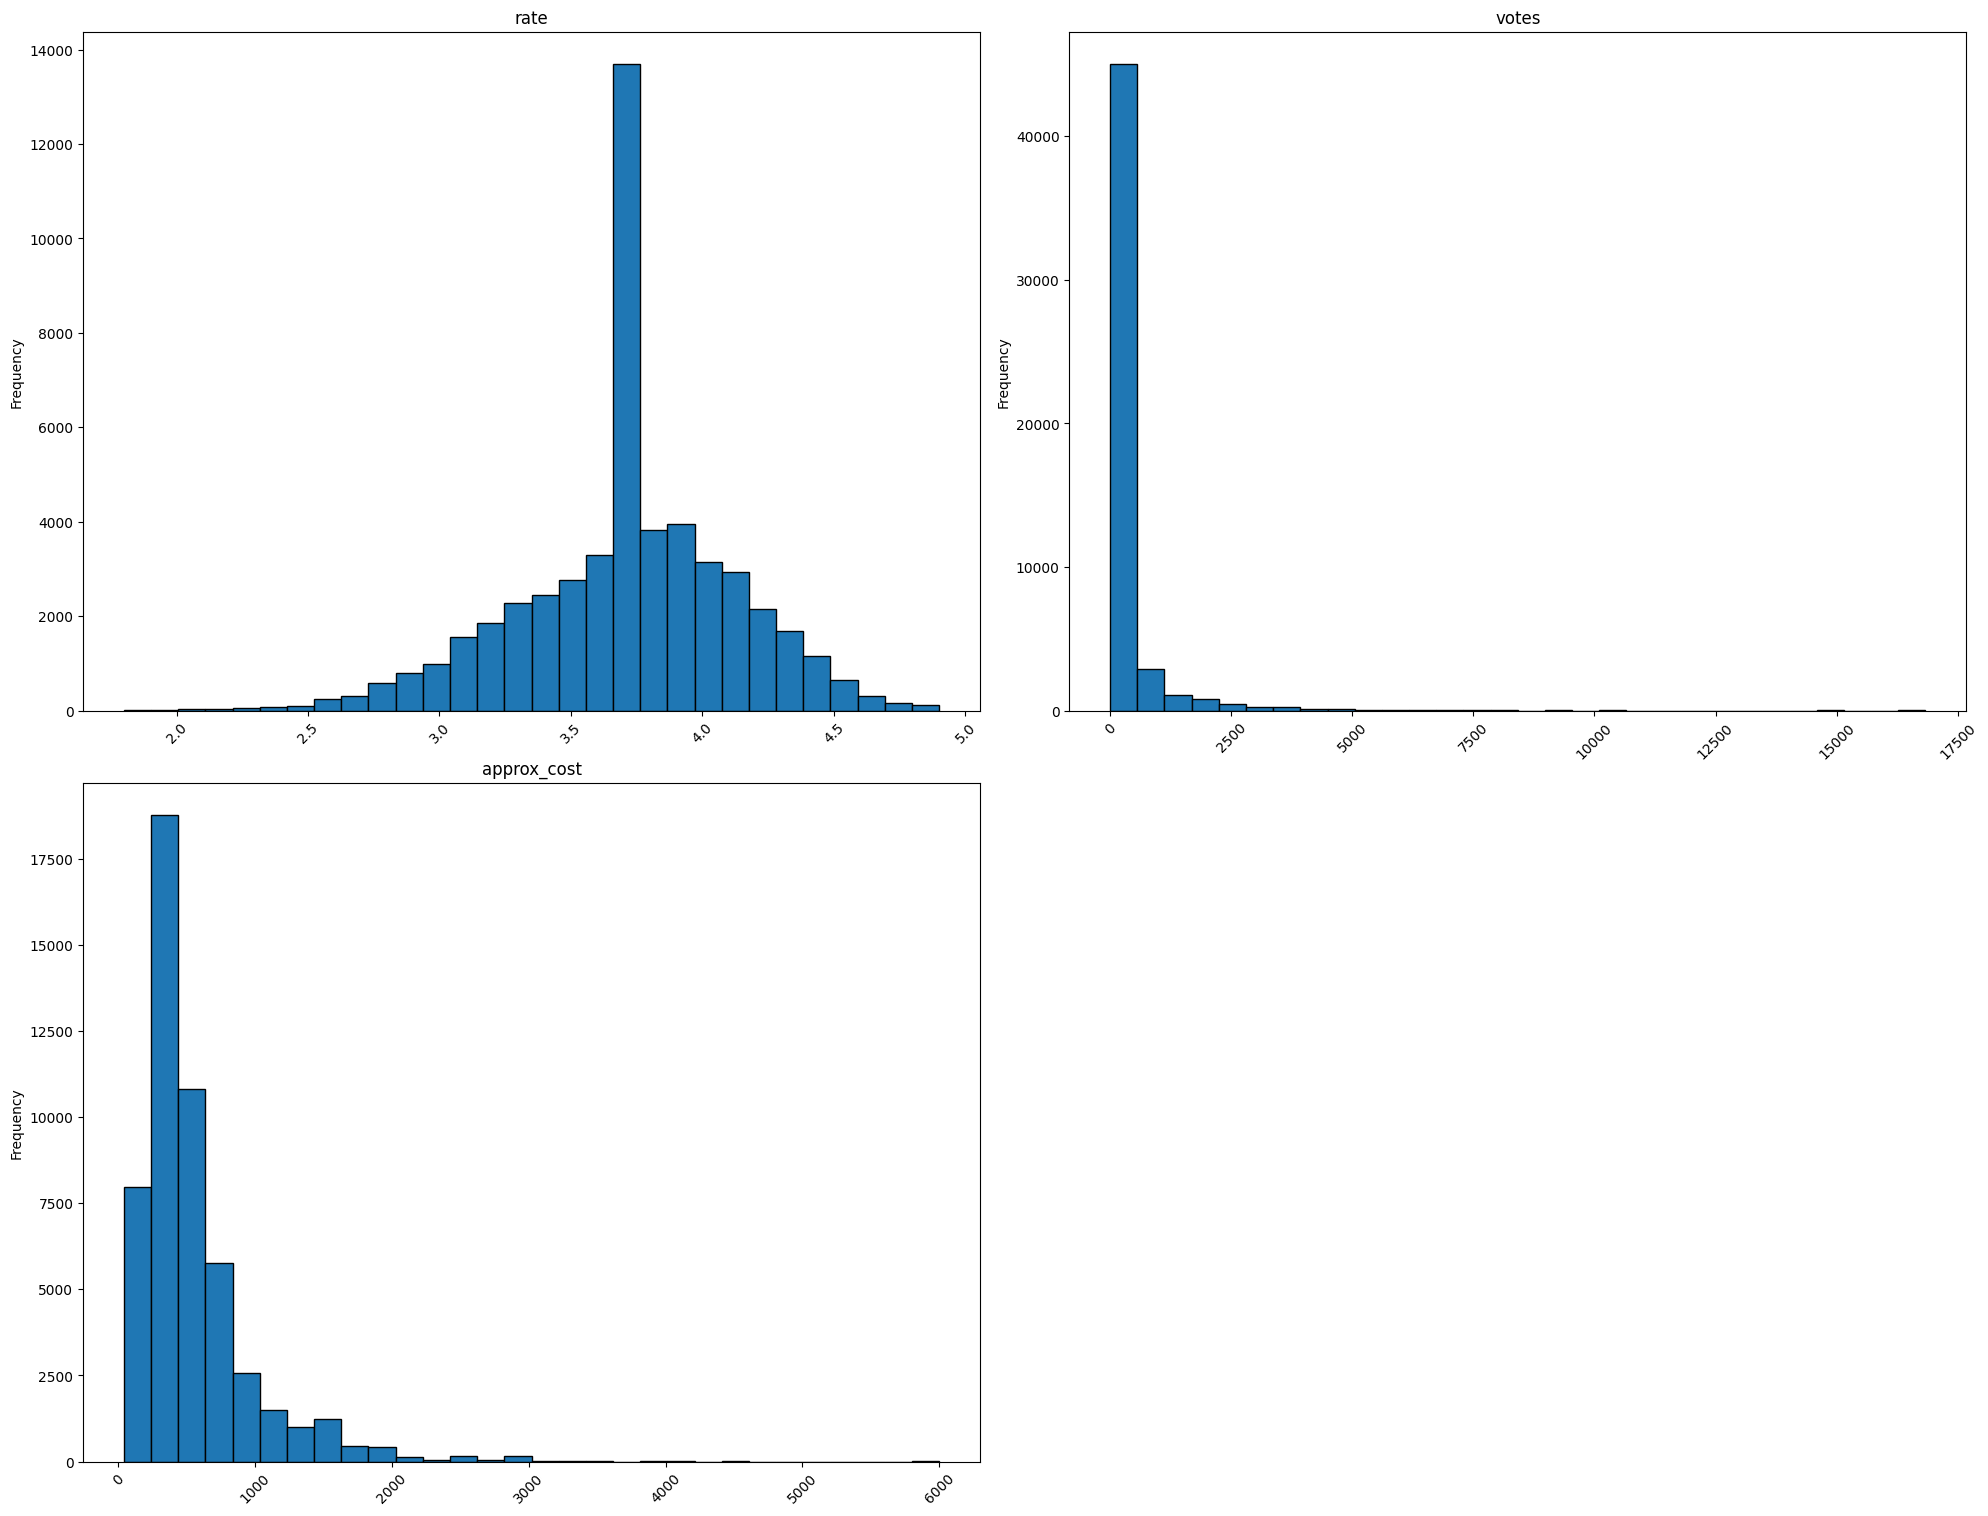

In [74]:
plt.figure(figsize=(20, 150))
for idx, feature in enumerate(Numerical_features):
    plt.subplot(20, 2, idx + 1)
    df[feature].plot(kind='hist', bins=30,edgecolor='black')
    plt.xticks(rotation=45)
    plt.title(feature)
plt.tight_layout()
plt.show()

Reset the indexing

In [30]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

# Data Visualization

Lets check for the most famous restaurants chains in Bangluru

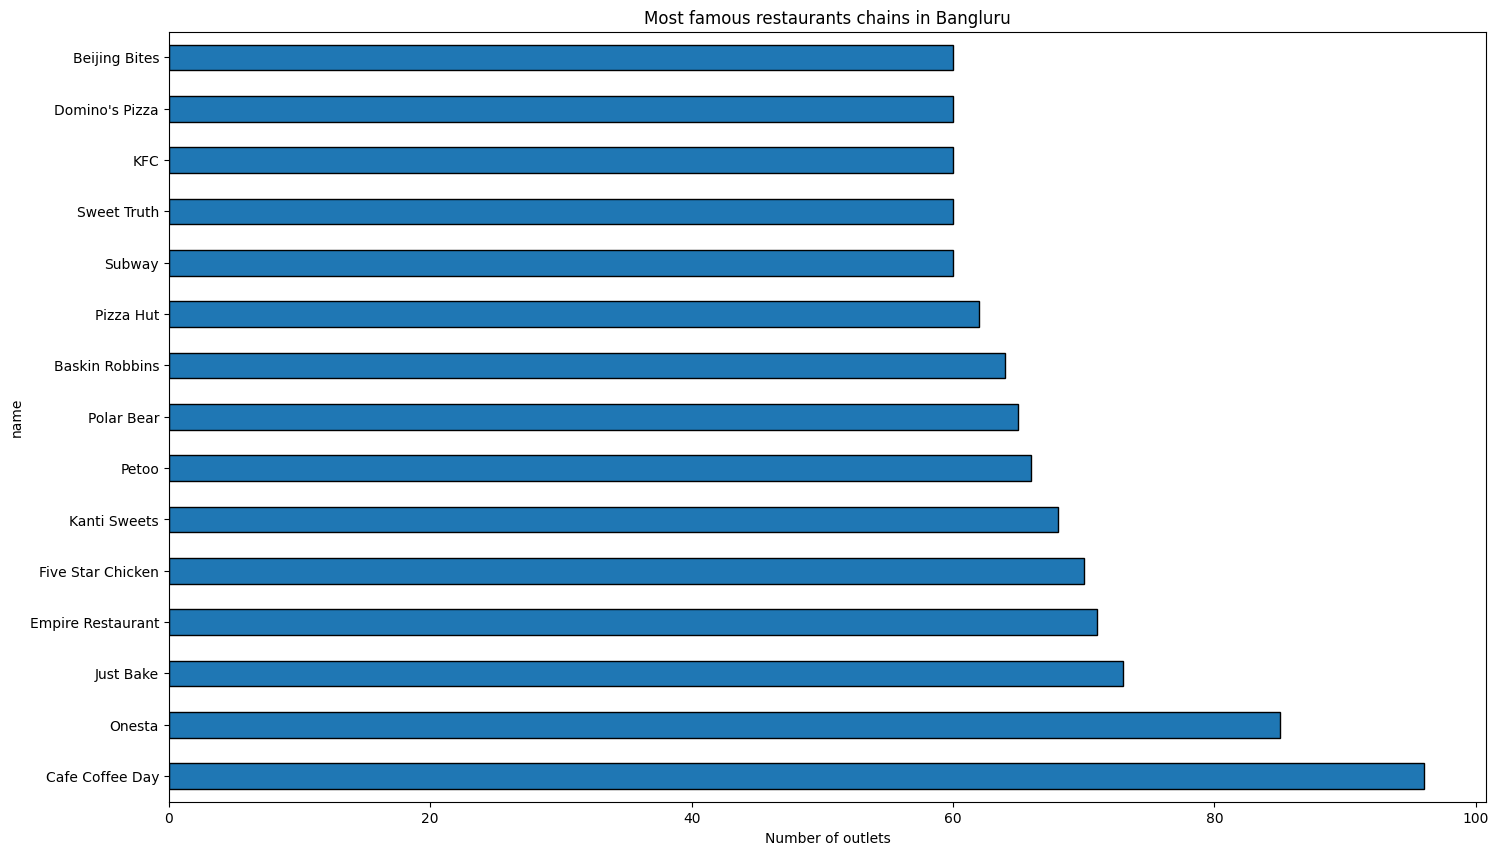

In [68]:
plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:15]
chains.plot(kind='barh', color='tab:blue',edgecolor='black')
# sns.barplot(x=chains,y=chains.index,palette="deep")
plt.title("Most famous restaurants chains in Bangluru")
plt.xlabel("Number of outlets")
plt.show()

Lets check for the restaurants who have got the highest orders

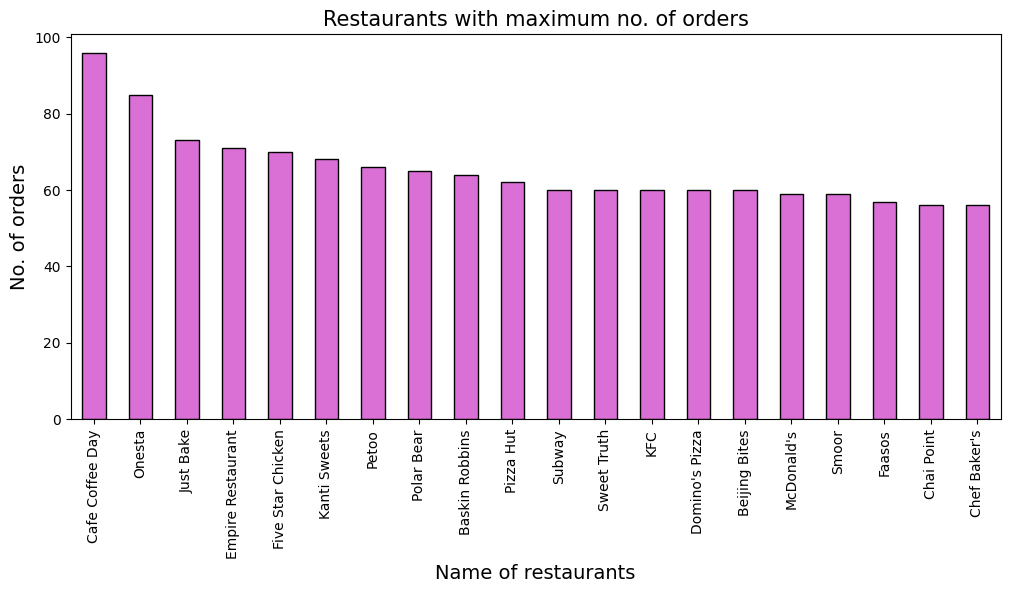

In [67]:
plt.figure(figsize= (12,5))
data=df['name'].value_counts()[:20]
data.plot(kind='bar',color='orchid',edgecolor='black')
plt.xlabel('Name of restaurants',size=14)
plt.ylabel("No. of orders",size=14)
plt.title("Restaurants with maximum no. of orders",fontsize=15)
plt.show()

Lets check how many restaurants have online orders facility

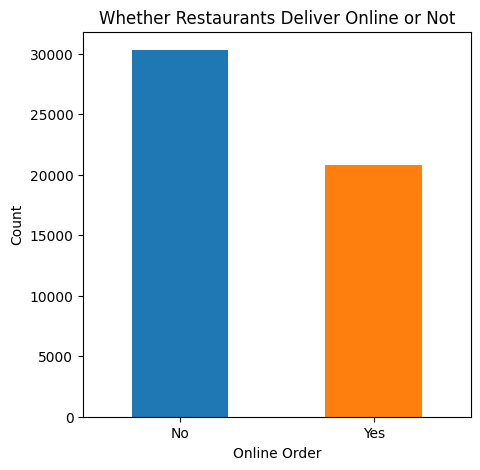

In [35]:
online_order_counts = df['online_order'].value_counts()

# Set up the figure size
plt.figure(figsize=(5, 5))

# Plotting using Pandas
online_order_counts.plot(kind='bar', color=['tab:blue', 'tab:orange'])

# Adding title and labels
plt.title("Whether Restaurants Deliver Online or Not")
plt.xlabel("Online Order")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)

# Show the plot
plt.show()

Lets check how many restaurants offer pre booking table bookings

([<matplotlib.axis.XTick at 0x1ed17371710>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

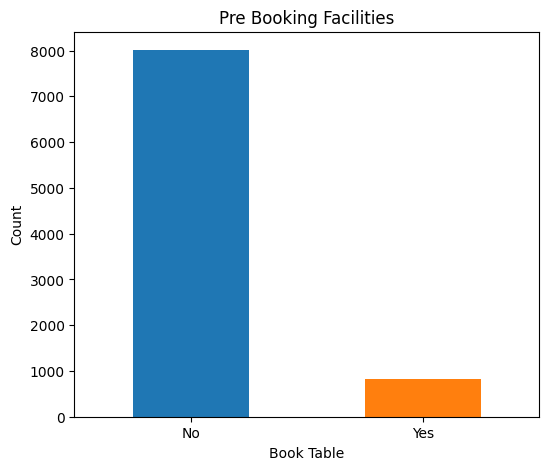

In [38]:
data = df[['name', 'book_table']].drop_duplicates()

# Set up the figure size
plt.figure(figsize=(6, 5))

# Plotting using Pandas
data['book_table'].value_counts().plot(kind='bar', color=['tab:blue', 'tab:orange'])

# Adding title and labels
plt.title("Pre Booking Facilities")
plt.xlabel("Book Table")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)

Lets check the locations that have highest orders

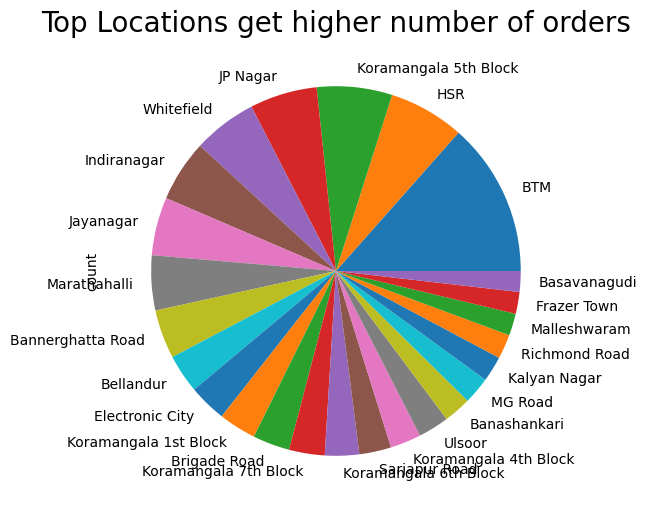

In [63]:
plt.figure(figsize=(12,6))
data=df.location.value_counts()[0:25]
data.plot(kind='pie')
plt.title("Top Locations get higher number of orders",size=20)
plt.show()

Lets check for the most common rstings for orders


Text(0.5, 1.0, 'Distribution of Rates')

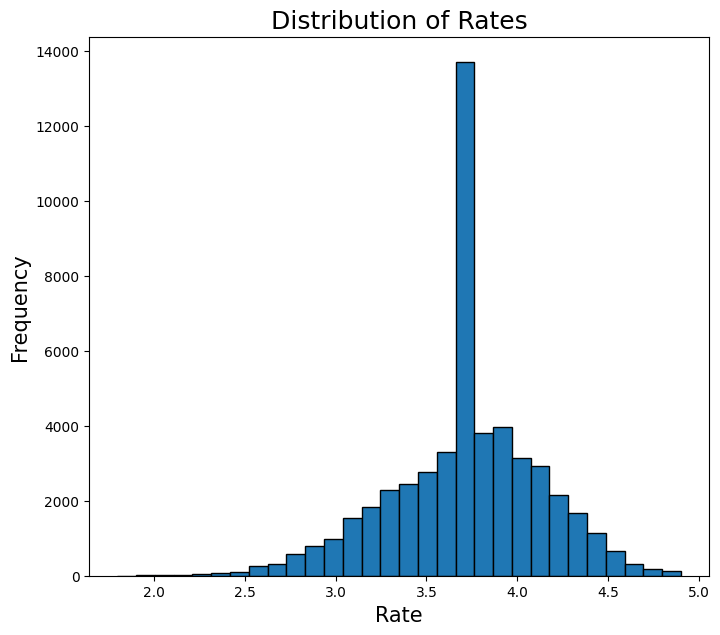

In [46]:
plt.figure(figsize=(8, 7))  # Set the figure size

# Plot the distribution using pandas plot.hist()
df['rate'].plot.hist(bins=30, edgecolor='black')

# Customize labels and title
plt.xlabel("Rate", size=15)
plt.ylabel("Frequency", size=15)
plt.title("Distribution of Rates", size=18)

Lets check for the common approximate costs for meal of two people

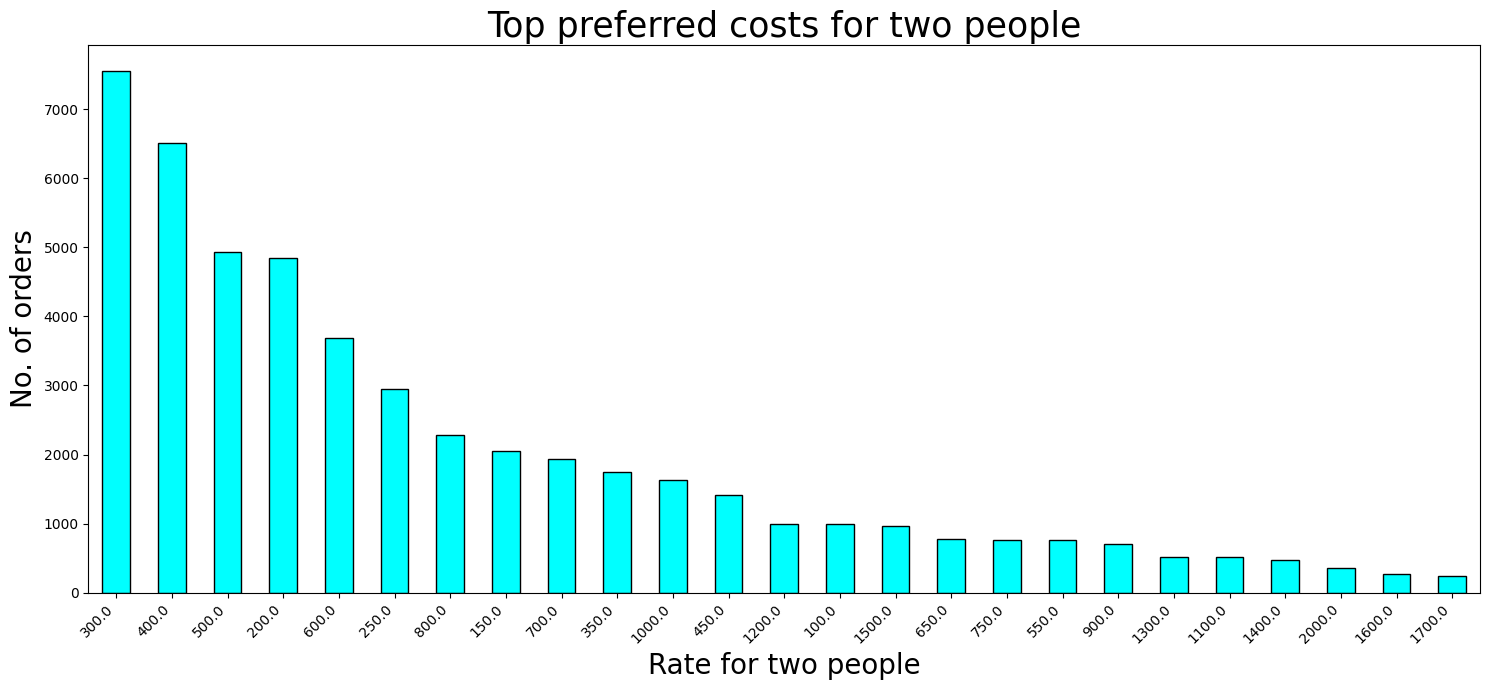

In [61]:
# Calculate value counts and take the top 25
data = df['approx_cost'].value_counts().reset_index()[:25]

# Rename columns
data.columns = ['approx_cost', 'count']

# Set 'approx_cost' as index
data = data.set_index('approx_cost')

# Plotting
plt.figure(figsize=(15, 7))
data['count'].plot(kind='bar',color='Cyan',edgecolor='black')
plt.xlabel("Rate for two people", size=20)
plt.ylabel("No. of orders", size=20)
plt.xticks(rotation=45, ha='right', size=10)  # Rotate x-axis labels for better visibility
plt.yticks(size=10)
plt.title("Top preferred costs for two people", size=25)
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

Lets check top 10 types of the orders restaurants offer

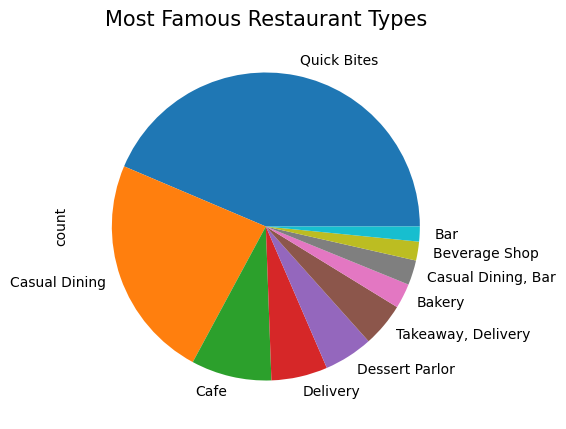

In [47]:
plt.figure(figsize=(12,5))
abc=df.rest_type.value_counts()[:10]
abc.plot(kind='pie')
plt.title("Most Famous Restaurant Types",fontsize=15)

plt.show()

Lets check for the most famous cusines among people

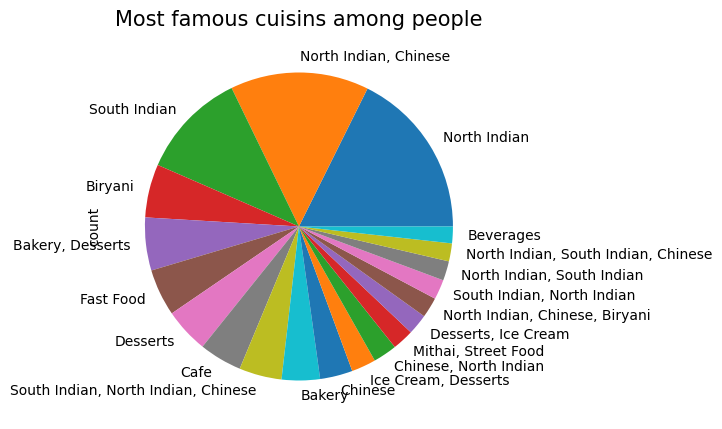

In [48]:
plt.figure(figsize=(12,5))
xyz=df.cuisines.value_counts()[:20].plot(kind='pie')
plt.title("Most famous cuisins among people",fontsize=15)
plt.show()

Lets check for the top locations with most number of restaurant

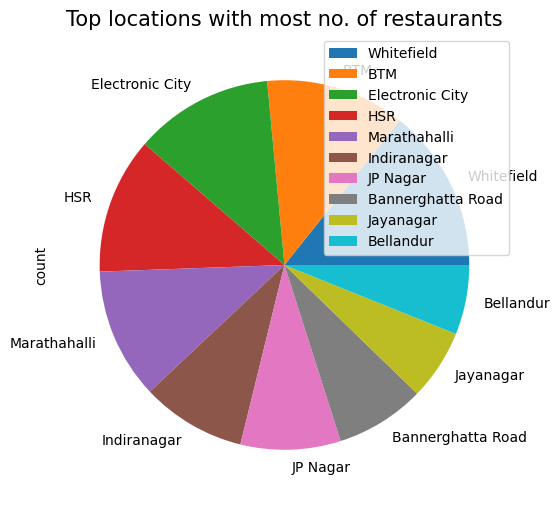

In [49]:
loc=pd.DataFrame(df.groupby(by='location')['name'].nunique())
loc.columns=['count']
loc.sort_values(by='count',ascending=False,inplace=True)
plt.rcParams['figure.figsize']=(8,6)
ax=loc[0:10].plot(kind='pie',subplots=True)
plt.title('Top locations with most no. of restaurants',size=15)
plt.show()

Lets find the relationship between features

<Figure size 1000x800 with 0 Axes>

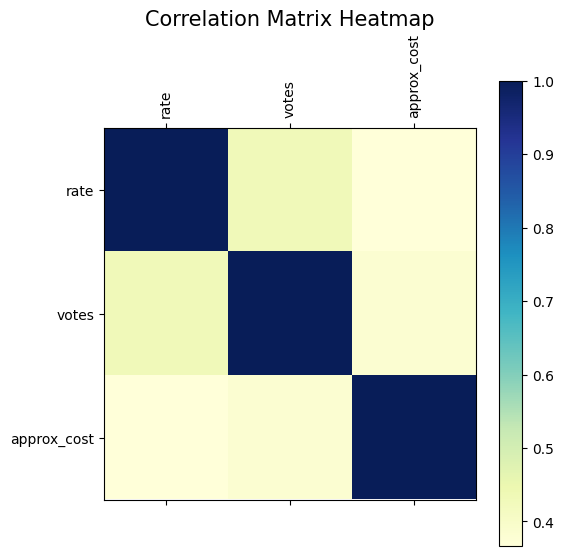

In [60]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='YlGnBu')  # Display heatmap
plt.colorbar()  # Show color bar

# Add labels, rotation for readability
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix Heatmap', size=15)

plt.show()
